In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
plt.style.use('nature')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [13]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]

In [14]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-24-2024-13-07-04_0.05164950234595578_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


5.0 0.0001312040043518841 24
6.5 6.78898813334831e-06 24
8.0 -0.0001560616174450083 22


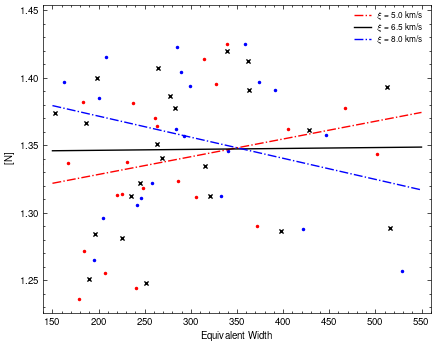

In [83]:

cs = ['r', 'k', 'b']
markers = ['.', 'x', '.']
plot_vmics = [5., 6.5, 8.0]
ls = ['-.', '-', '-.']

i = 0 
plt.figure(figsize=(5, 4))
# plt.figure(figsize = (5,4))
for vmic in plot_vmics:

    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 2*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    full_label = f"vmic = {vmic}, corr = {corr}"
    plt.scatter(ews[::1],nfes[::1], c=cs[i], marker = markers[i])
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(150, 550, 100)
    y = m*x + c
    print(vmic, m, len(nfes))
    plt.plot(x,y, c = cs[i], ls = ls[i], label = rf"$\xi$ = {vmic} km/s")
    plt.legend(fontsize = 6)
    plt.ylabel("[N]")
    plt.xlabel("Equivalent Width")
    plt.xlim(140,560)

    i+=1

In [46]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "WISE222"
observed_file = f"{observed_path}/{star}_clean.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

wavecorr = obs_wave*1e-4
fluxcorr = obs_flux

In [72]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin, lmax = 22871,  22885
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 8.0
oguess = 7.6
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.9-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Mg":-1, "S" : -1, "Si":-1, "Ca":-0.8, "Fe":-0.8}
                    #  "Fe" : -1.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1, "Ca":-1, "Co":-1} 
rat = 8
vmac = 7.5
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  
basepath = "../input_files/linelists/individual/"


In [73]:
turbospectrum_paths["line_list_path"] = "../input_files/linelists/linelist_5000K/"
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths["line_list_path"] = basepath + "C2"
wavelength, syntflux_C2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths["line_list_path"] = basepath + "CN_new"
wavelength, syntflux_CN = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed


In [74]:
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.3-8.56, "N" : 7.55-7.98, "O" : oguess-8.77, "Mg":-1, "S" : -1, "Si":-1, "Ca":-0.8, "Fe":-0.8}

In [75]:
turbospectrum_paths["line_list_path"] = "../input_files/linelists/linelist_5000K/"
wavelength, flux2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths["line_list_path"] = basepath + "C2"
wavelength, syntflux_C22 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths["line_list_path"] = basepath + "CN_new"
wavelength, syntflux_CN2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed


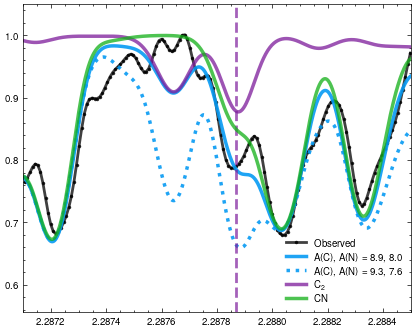

In [257]:

plt.figure(figsize=(5, 4))
l, r = 22871,  22885
l, r = l*1e-4, r*1e-4
mask = (wavecorr > l) & (wavecorr < r) 
plt.xlim(l,r)
plt.ylim(0.556,1.05)

plt.plot(wavecorr[mask], fluxcorr[mask], "k.-", lw = 2, alpha=0.75, label = "Observed")
plt.plot(wavelength*1e-4, flux, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"A(C), A(N) = 8.9, 8.0")
plt.plot(wavelength*1e-4, flux2, lw = 2.5, c = 'xkcd:azure', ls = ":", alpha = 0.9, label = r"A(C), A(N) = 9.3, 7.6")

# plt.plot(wavelength*1e-4, syntflux_all2, lw = 2.5, c = 'xkcd:black', alpha = 0.9, label = r"full")
plt.axvline(2.28787, lw = 2., c = 'xkcd:purple', ls = "--", alpha = 0.7)
plt.plot(wavelength*1e-4, syntflux_C2, lw = 2.5, c = 'xkcd:purple', alpha = 0.76, label = r"C$_2$")
plt.plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")

plt.legend(fontsize = 7, loc = "lower right")

In [91]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-58-56_0.3369505278663768_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [92]:
Ns = (7.98+(output_trimmed['N_Fe'])).round(3)

In [287]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-18-2024-11-15-46_0.5778776628396651_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [288]:
Os = solar_abundances['O']+(output_trimmed['O_Fe'])

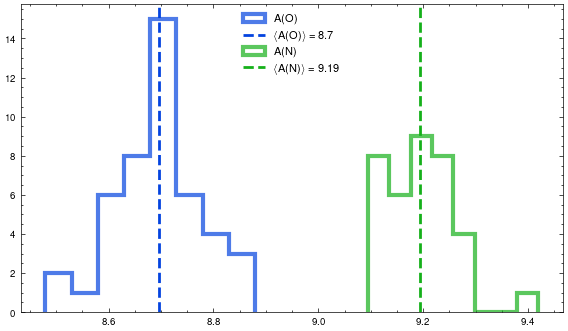

In [289]:
plt.figure(figsize=(7, 4))
plt.hist(Os, bins = 8, histtype = 'step', color = 'xkcd:blue', alpha = 0.7, lw = 3, label = "A(O)");
plt.axvline(np.mean(Os), c = 'xkcd:blue', lw = 2, ls = "--", label = rf"$\langle$A(O)$\rangle = {(np.mean(Os).round(2))}$")
plt.hist(Ns, bins = 8, histtype = 'step', color = 'xkcd:green', alpha = 0.7, lw = 3, label = "A(N)");
plt.axvline(np.mean(Ns), c = 'xkcd:green', lw = 2, ls = "--", label = rf"$\langle$A(N)$\rangle = {(np.mean(Ns).round(2))}$")
plt.legend(loc = "upper center", fontsize = 8)

In [115]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-56-09_0.9324879596047584_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

In [134]:
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip

allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-56-09_0.9324879596047584_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    
    # Sigma clipping for red_chi_squared
    clipped_chi = sigma_clip(subdf['red_chi_squared'], sigma=2.5, maxiters=5)
    meanchi = np.mean(clipped_chi)
    stdchi = np.std(clipped_chi)
    
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

print("RVs:", rvs)
print("Mean Chi:", chis)
print("Std Chi:", dchis)
print("O Abundances:", oabunds)
print("Std O Abundances:", doabunds)

RVs: [np.float64(-0.41914256411599454), np.float64(-0.429437935739586), np.float64(-0.46230457179674833), np.float64(-0.40878149833691957), np.float64(-0.4585503619026743), np.float64(-0.4928201550486662), np.float64(-0.43793378124744714), np.float64(-0.4644938918440831), np.float64(-0.47814367292313015), np.float64(-0.48145428879482816), np.float64(-0.4995625135053676), np.float64(-0.4579560179584199), np.float64(-0.47133009944258275), np.float64(-0.4605427828096172), np.float64(-0.46854769730033413), np.float64(-0.5831324359228831), np.float64(-0.47592120724692677), np.float64(-0.5420629865841801), np.float64(-0.5071740688596846), np.float64(-0.5526700413588561), np.float64(-0.49826406712316035), np.float64(-0.5143401678786027), np.float64(-0.5293625594269852), np.float64(-0.535341048547048), np.float64(-0.5894364435597568), np.float64(-0.5560274378068635), np.float64(-0.5581630790503261), np.float64(-0.5279217717596816), np.float64(-0.5850697053004768), np.float64(-0.601538737383416

0.52 -0.11 0.14


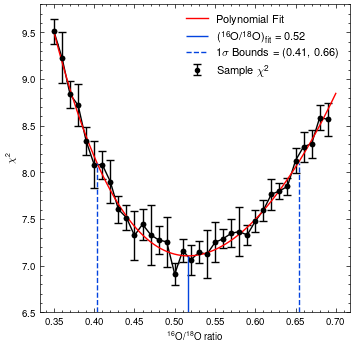

In [215]:
plt.figure(figsize=(4, 4))
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3, label = r"Sample $\chi^2$")

p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r', label = "Polynomial Fit")
plt.vlines(x[np.where(y == np.min(y))], ymin = 6.5, ymax = np.min(y), color='xkcd:blue', label = r"$(^{16}$O/$^{18}$O$)_{\text{fit}} = 0.52$")
xfit = x[np.where(y == np.min(y))]
# plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.vlines(x[idx], color='xkcd:blue', ymin = 6.5, ymax = ybound, ls = "--", label = fr"$1\sigma$ Bounds = ({0.41}, {0.52+.14})")
plt.vlines(x[idx2], color='xkcd:blue', ymin = 6.5, ymax = ybound, ls = "--")
plt.ylim(6.5, 9.8)
# plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel(r"$^{16}$O/$^{18}$O ratio")
plt.legend(fontsize = 8)
# find x values nearest to ybounds


In [208]:
plt.style.use('nature')

In [225]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
lists['atoms'] = basepath + "atoms_5500K_newCI"

teff = 5500
logg = 1.0
met = 0.0
vmic = 6.5
lmin, lmax = 23740,  23850
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess =  9.195
oguess = 8.695
rat = 0.52
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.52-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 
# nguess = 
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.72-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe":-0.2, "Mg":+0.2} 

vmac = 0
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [226]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
wavehd, syntfluxhd_CN = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wavehd1, syntfluxhd_CO16 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['12C18O'] 
wavehd2, syntfluxhd_CO18 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5500K/"
wavehd, syntfluxhd_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
LINELIST WARNING! File /media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/../input_files/linelists/individual/CN_new/12C14N_TriHy2.plez.bz2 is not a valid linelist file
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [229]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "HD137613"
observed_file = f"{observed_path}/{star}.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

wavecorrhd = obs_wave*1e-4
fluxcorrhd = obs_flux

In [231]:
wavecorrhd

array([2.25497741, 2.25498671, 2.254996  , ..., 2.54786732, 2.54786732,
       2.54786732])

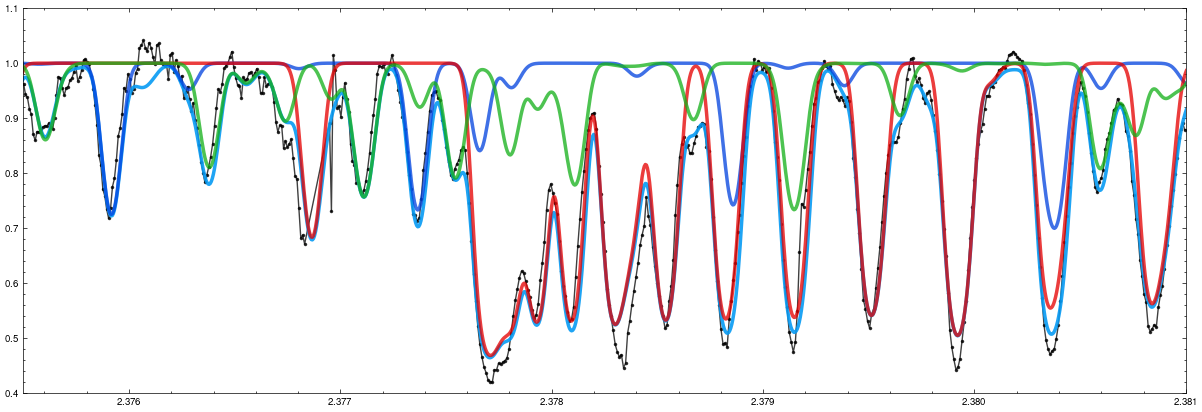

In [280]:
plt.figure(figsize=(15, 5))
l, r = 23755,  23810
l, r = l*1e-4, r*1e-4
mask = (wavecorrhd > l) & (wavecorrhd < r) 
plt.xlim(l,r)
plt.ylim(0.4, 1.1)
plt.plot(wavecorrhd[mask], fluxcorrhd[mask], "k.-", lw = 1, alpha=0.75)
plt.plot(wavehd*1e-4, syntfluxhd_all, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"full")
# plt.plot(wavehd*1e-4, syntfluxhd_atoms, lw = 1.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
plt.plot(wavehd*1e-4, syntfluxhd_CO16, lw = 2.5, c = 'xkcd:blue', alpha = 0.76, label = r"$^{12}$C$^{16}$O")
plt.plot(wavehd*1e-4, syntfluxhd_CO18, lw = 2.5, c = 'xkcd:red', alpha = 0.76, label = r"$^{12}$C$^{18}$O")
plt.plot(wavehd*1e-4, syntfluxhd_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")

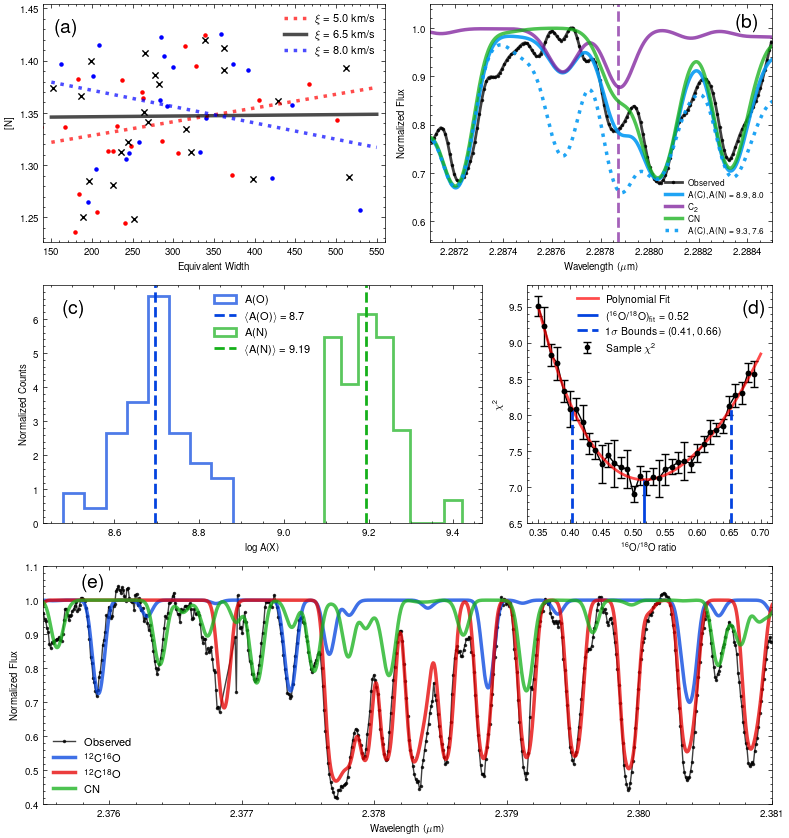

In [300]:
mosaic = """
    AAAABBBB
    CCCCCDDD
    EEEEEEEE
    """

# matplotlib.verbose.level = 'debug-annoying'

fig = plt.figure(layout="tight", figsize = (8,8.5))
ax_dict = fig.subplot_mosaic(mosaic)


cs = ['r', 'k', 'b']
markers = ['.', 'x', '.']
plot_vmics = [5., 6.5, 8.0]
ls = [':', '-', ':']

i = 0 
# ax_dict['A'].figure(figsize = (5,4))
for vmic in plot_vmics:

    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 2*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    full_label = f"vmic = {vmic}, corr = {corr}"
    ax_dict['A'].scatter(ews[::1],nfes[::1], c=cs[i], marker = markers[i], s = 20)
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(150, 550, 100)
    y = m*x + c
    ax_dict['A'].plot(x,y, c = cs[i], ls = ls[i], label = rf"$\xi$ = {vmic} km/s", lw = 2.5, alpha = 0.7)
    ax_dict['A'].set_ylabel("[N]")
    ax_dict['A'].set_xlabel("Equivalent Width")
    ax_dict['A'].set_xlim(140,560)

    i+=1
ax_dict['A'].legend(fontsize = 8)


l, r = 22871,  22885
l, r = l*1e-4, r*1e-4
mask = (wavecorr > l) & (wavecorr < r) 
ax_dict['B'].set_xlim(l,r)
ax_dict['B'].set_ylim(0.556,1.05)

ax_dict['B'].plot(wavecorr[mask], fluxcorr[mask], "k.-", lw = 2, alpha=0.75, label = "Observed")
ax_dict['B'].axvline(2.28787, lw = 2., c = 'xkcd:purple', ls = "--", alpha = 0.7)
ax_dict['B'].plot(wavelength*1e-4, flux, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"A(C), A(N) = 8.9, 8.0")
# ax_dict['B'].plot(wavelength*1e-4, syntflux_all2, lw = 2.5, c = 'xkcd:black', alpha = 0.9, label = r"full")

ax_dict['B'].plot(wavelength*1e-4, syntflux_C2, lw = 2.5, c = 'xkcd:purple', alpha = 0.76, label = r"C$_2$")
ax_dict['B'].plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")
ax_dict['B'].plot(wavelength*1e-4, flux2, lw = 2.5, c = 'xkcd:azure', ls = ":", alpha = 0.9, label = r"A(C), A(N) = 9.3, 7.6")


ax_dict['B'].legend(fontsize = 6., loc = "lower right")
ax_dict['B'].set_xlabel(r'Wavelength ($\mu$m)')
ax_dict['B'].set_ylabel(r'Normalized Flux')

ax_dict['C'].hist(Os, bins = 8, histtype = 'step', color = 'xkcd:blue', alpha = 0.7, lw = 2, label = "A(O)", density=True);
ax_dict['C'].axvline(np.mean(Os), c = 'xkcd:blue', lw = 2, ls = "--", label = rf"$\langle$A(O)$\rangle = {(np.mean(Os).round(2))}$")
ax_dict['C'].hist(Ns, bins = 8, histtype = 'step', color = 'xkcd:green', alpha = 0.7, lw = 2, label = "A(N)", density=True);
ax_dict['C'].axvline(np.mean(Ns), c = 'xkcd:green', lw = 2, ls = "--", label = rf"$\langle$A(N)$\rangle = {(np.mean(Ns).round(2))}$")
ax_dict['C'].legend(loc = "upper center", fontsize = 8)
ax_dict['C'].set_xlabel(r"$\log$ A(X)")
ax_dict['C'].set_ylabel(r"Normalized Counts")

ax_dict['D'].plot(rats, chis, 'ko-')
ax_dict['D'].errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3, label = r"Sample $\chi^2$")
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
ax_dict['D'].plot(x, y, 'r', label = "Polynomial Fit", lw = 2, alpha = 0.7)
ax_dict['D'].vlines(x[np.where(y == np.min(y))], ymin = 6.5, ymax = np.min(y), color='xkcd:blue', label = r"$(^{16}$O/$^{18}$O$)_{\text{fit}} = 0.52$", lw = 2)
xfit = x[np.where(y == np.min(y))]
# plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
ax_dict['D'].vlines(x[idx], color='xkcd:blue', ymin = 6.5, ymax = ybound, ls = "--", label = fr"$1\sigma$ Bounds = ({0.41}, {0.52+.14})", lw = 2)
ax_dict['D'].vlines(x[idx2], color='xkcd:blue', ymin = 6.5, ymax = ybound, ls = "--", lw = 2)
ax_dict['D'].set_ylim(6.5, 9.8)
# ax_dict['D'].set_xlim(0.3, 0.7)

ax_dict['D'].set_ylabel(r'$\chi^2$')
ax_dict['D'].set_xlabel(r"$^{16}$O/$^{18}$O ratio")
ax_dict['D'].legend(fontsize = 7.5)

l, r = 23755,  23810
l, r = l*1e-4, r*1e-4
mask = (wavecorrhd > l) & (wavecorrhd < r) 
ax_dict['E'].set_xlim(l,r)
ax_dict['E'].set_ylim(0.4, 1.1)
ax_dict['E'].plot(wavecorrhd[mask], fluxcorrhd[mask], "k.-", lw = 1, alpha=0.75, label = "Observed")
# ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_all, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"full")
# ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_atoms, lw = 1.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CO16, lw = 2.5, c = 'xkcd:blue', alpha = 0.76, label = r"$^{12}$C$^{16}$O")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CO18, lw = 2.5, c = 'xkcd:red', alpha = 0.76, label = r"$^{12}$C$^{18}$O")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")
ax_dict['E'].legend(fontsize = 8)
ax_dict['E'].set_xlabel(r'Wavelength ($\mu$m)')
ax_dict['E'].set_ylabel(r'Normalized Flux')

fs = 14
ax_dict['A'].text(0.07, 0.9, '(a)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['A'].transAxes, fontsize = fs)
ax_dict['B'].text(1-0.07, 0.92, '(b)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['B'].transAxes, fontsize = fs)
ax_dict['C'].text(0.07, 0.9, '(c)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['C'].transAxes, fontsize = fs)
ax_dict['D'].text(1-0.07, 0.9, '(d)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['D'].transAxes, fontsize = fs)
ax_dict['E'].text(0.07, 0.93, '(e)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['E'].transAxes, fontsize = fs)

fig.savefig("./plots/megaplot.pdf", dpi = 300)
fig.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/megaplot.pdf", dpi = 300, bbox_inches='tight')


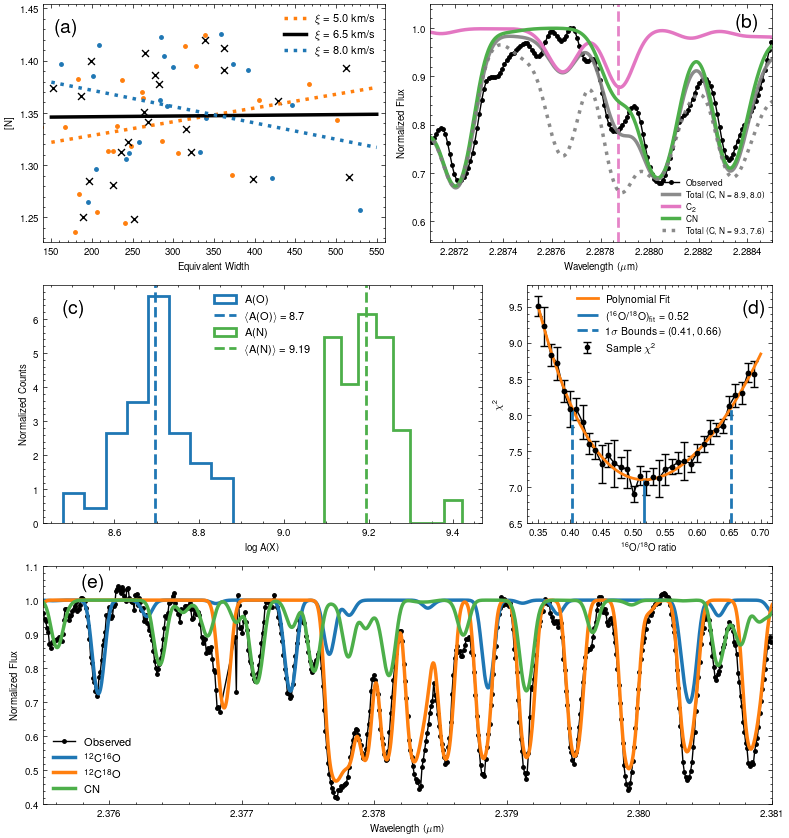

In [354]:
mosaic = """
    AAAABBBB
    CCCCCDDD
    EEEEEEEE
    """

# matplotlib.verbose.level = 'debug-annoying'

fig = plt.figure(layout="tight", figsize = (8,8.5))
ax_dict = fig.subplot_mosaic(mosaic)


cs = [colors['orange'], 'k', colors['blue']]
markers = ['.', 'x', '.']
plot_vmics = [5., 6.5, 8.0]
ls = [':', '-', ':']

i = 0 
# ax_dict['A'].figure(figsize = (5,4))
for vmic in plot_vmics:

    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 2*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    full_label = f"vmic = {vmic}, corr = {corr}"
    ax_dict['A'].scatter(ews[::1],nfes[::1], c=cs[i], marker = markers[i], s = 25)
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(150, 550, 100)
    y = m*x + c
    ax_dict['A'].plot(x,y, c = cs[i], ls = ls[i], label = rf"$\xi$ = {vmic} km/s", lw = 2.5, alpha = 1)
    ax_dict['A'].set_ylabel("[N]")
    ax_dict['A'].set_xlabel("Equivalent Width")
    ax_dict['A'].set_xlim(140,560)

    i+=1
ax_dict['A'].legend(fontsize = 8)


l, r = 22871,  22885
l, r = l*1e-4, r*1e-4
mask = (wavecorr > l) & (wavecorr < r) 
ax_dict['B'].set_xlim(l,r)
ax_dict['B'].set_ylim(0.556,1.05)

ax_dict['B'].plot(wavecorr[mask], fluxcorr[mask], "k.-", lw = 1, alpha=1.0, label = "Observed", ms = 5)
ax_dict['B'].axvline(2.28787, lw = 2., c = colors['pink'], ls = "--", alpha = 0.9)
ax_dict['B'].plot(wavelength*1e-4, flux, lw = 2.5, c = colors['gray'], alpha = 0.9, label = r"Total (C, N = 8.9, 8.0)")
# ax_dict['B'].plot(wavelength*1e-4, syntflux_all2, lw = 2.5, c = 'xkcd:black', alpha = 0.9, label = r"full")

ax_dict['B'].plot(wavelength*1e-4, syntflux_C2, lw = 2.5, c = colors['pink'], alpha = 1.0, label = r"C$_2$")
ax_dict['B'].plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = colors['green'], alpha = 1.0, label = "CN")
ax_dict['B'].plot(wavelength*1e-4, flux2, lw = 2.5, c = colors['gray'], ls = ":", alpha = 0.9, label = r"Total (C, N = 9.3, 7.6)")


ax_dict['B'].legend(fontsize = 6., loc = "lower right")
ax_dict['B'].set_xlabel(r'Wavelength ($\mu$m)')
ax_dict['B'].set_ylabel(r'Normalized Flux')

ax_dict['C'].hist(Os, bins = 8, histtype = 'step', color = colors['blue'], alpha = 1.0, lw = 2, label = "A(O)", density=True);
ax_dict['C'].axvline(np.mean(Os), c = colors['blue'], lw = 2, ls = "--", label = rf"$\langle$A(O)$\rangle = {(np.mean(Os).round(2))}$")
ax_dict['C'].hist(Ns, bins = 8, histtype = 'step', color = colors['green'], alpha = 1.0, lw = 2, label = "A(N)", density=True);
ax_dict['C'].axvline(np.mean(Ns), c = colors['green'], lw = 2, ls = "--", label = rf"$\langle$A(N)$\rangle = {(np.mean(Ns).round(2))}$")
ax_dict['C'].legend(loc = "upper center", fontsize = 8)
ax_dict['C'].set_xlabel(r"$\log$ A(X)")
ax_dict['C'].set_ylabel(r"Normalized Counts")

ax_dict['D'].plot(rats, chis, 'ko-')
ax_dict['D'].errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3, label = r"Sample $\chi^2$")
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
ax_dict['D'].plot(x, y, colors['orange'], label = "Polynomial Fit", lw = 2, alpha = 1.0)
ax_dict['D'].vlines(x[np.where(y == np.min(y))], ymin = 6.5, ymax = np.min(y), color=colors['blue'], label = r"$(^{16}$O/$^{18}$O$)_{\text{fit}} = 0.52$", lw = 2)
xfit = x[np.where(y == np.min(y))]
# plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
ax_dict['D'].vlines(x[idx], color=colors['blue'], ymin = 6.5, ymax = ybound, ls = "--", label = fr"$1\sigma$ Bounds = ({0.41}, {0.52+.14})", lw = 2)
ax_dict['D'].vlines(x[idx2], color=colors['blue'], ymin = 6.5, ymax = ybound, ls = "--", lw = 2)
ax_dict['D'].set_ylim(6.5, 9.8)
# ax_dict['D'].set_xlim(0.3, 0.7)

ax_dict['D'].set_ylabel(r'$\chi^2$')
ax_dict['D'].set_xlabel(r"$^{16}$O/$^{18}$O ratio")
ax_dict['D'].legend(fontsize = 7.5)

l, r = 23755,  23810
l, r = l*1e-4, r*1e-4
mask = (wavecorrhd > l) & (wavecorrhd < r) 
ax_dict['E'].set_xlim(l,r)
ax_dict['E'].set_ylim(0.4, 1.1)
ax_dict['E'].plot(wavecorrhd[mask], fluxcorrhd[mask], "k.-", lw = 1, label = "Observed", ms = 5)
# ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_all, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"full")
# ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_atoms, lw = 1.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CO16, lw = 2.5, c = colors['blue'], label = r"$^{12}$C$^{16}$O")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CO18, lw = 2.5, c = colors['orange'], label = r"$^{12}$C$^{18}$O")
ax_dict['E'].plot(wavehd*1e-4, syntfluxhd_CN, lw = 2.5, c = colors['green'], label = "CN")
ax_dict['E'].legend(fontsize = 8)
ax_dict['E'].set_xlabel(r'Wavelength ($\mu$m)')
ax_dict['E'].set_ylabel(r'Normalized Flux')

fs = 14
ax_dict['A'].text(0.07, 0.9, '(a)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['A'].transAxes, fontsize = fs)
ax_dict['B'].text(1-0.07, 0.92, '(b)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['B'].transAxes, fontsize = fs)
ax_dict['C'].text(0.07, 0.9, '(c)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['C'].transAxes, fontsize = fs)
ax_dict['D'].text(1-0.07, 0.9, '(d)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['D'].transAxes, fontsize = fs)
ax_dict['E'].text(0.07, 0.93, '(e)',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax_dict['E'].transAxes, fontsize = fs)

fig.savefig("./plots/megaplot.pdf", dpi = 300)
fig.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/megaplot.pdf", dpi = 300, bbox_inches='tight')


In [349]:
colors = {
    'blue':    '#1F77B4', 
    'orange':  '#FF7F0E',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#9467BD',
    'gray':    '#7F7F7F',
    'red':     '#D62728',
    'yellow':  '#dede00',
    'pink': '#E377C2',
    'olive': "BCBD22"

} 

In [316]:
colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 